
## Lab 7: Working with Dates and Times 



**Due Date: Friday March 27, 2020 at 11:59 AM.**

`pandas` supports many methods for manipulating dates and times. For Project 1, we will need to understand timestamps of data scraped from the internet. While we could work with dates and times as strings, it will be helpful for us to understand  

* Objects for storing dates / times 
* Methods for accessing and modifying dates / times
* Switching between timezones

We will use a financial dataset consisting of information about stock movements.

In [1]:
import datetime
from datetime import datetime
from datetime import timedelta
import pytz

import numpy as np
import pandas as pd

import sys
from IPython.display import Image

In [2]:
# TEST 

assert 'pandas' in sys.modules and "pd" in locals()
assert 'numpy' in sys.modules and "np" in locals()
assert 'pytz' in sys.modules 
assert 'datetime' in sys.modules 

### 1. Date and Time Data Types

Before studying dates and times in the `pandas` package, we will try to understand objects for storing dates and times. We will use the `datetime` package. 

Each `datetime` object consists of year, month and day in the [Gregorian calendar](https://en.wikipedia.org/wiki/Gregorian_calendar).  

In [3]:
now = datetime.now()
print(now.year, now.month, now.day)


2020 3 23


Moreover `datetime` objects can store time of day as hours, minutes, seconds, and microseconds  

In [4]:
print(now.hour, now.minute, now.second, now.microsecond)

9 26 24 547640


The package allows us to [overload](https://en.wikipedia.org/wiki/Function_overloading) arithmetic operations. 

For example, we can determine the elapsed time between two dates by applying subtraction.

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print("Days ", delta.days)
print("Seconds ", delta.seconds)

Days  926
Seconds  56700


Note that the difference between two dates is a `timedelta` object.

In [6]:
type(delta)

datetime.timedelta

We can incorporate `timedelta` objects into arithmetic operations

In [7]:
start = datetime(2011, 1, 7)
finish = start + 2 * timedelta(days = 4)
print(finish.year, finish.month, finish.day)

2011 1 15


### 1.1 Coverting between string and datetime

We can cast a string to a `datetime` object or cast a `datetime` object to a string. For example, if we print a `datetime` object then we get a representation as a string.  

In [8]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [9]:
print("Format: (4 digit year) - (2 digit month) - (2 digit day)\n",stamp.strftime('%Y-%m-%d'))

Format: (4 digit year) - (2 digit month) - (2 digit day)
 2011-01-03


If we know the format of a string, then we can convert it to a `datetime` object.

In [10]:
str_date = '201101/03'
datetime.strptime(str_date, '%Y%m/%d')

datetime.datetime(2011, 1, 3, 0, 0)

### 1.2 Using datetime with pandas

Often we want to use `datetime` objects in the index of a `pandas` series or dataframe.

In [11]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.568634
2011-01-05   -0.563891
2011-01-07   -0.354992
2011-01-08    0.363780
2011-01-10   -0.813957
2011-01-12    0.273905
dtype: float64

Note that the index is a `DatetimeIndex` meaning a `pandas` data structure that support operations like substraction. 

In [12]:
print("Index type", type(ts.index))

Index type <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Alternatively, we can skip the `datetime` package to convert from a string using `to_datetime` method.

In [13]:
datestrs = ['7/6/2011', '8/6/2011']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

Note that we can handle missing dates like missing numbers. Instead of `NaN` we have `NaT`.

In [14]:
date_index = pd.to_datetime(datestrs + [None])
date_index

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

We can check for missing values with `isna`

In [15]:
pd.isna(date_index)

array([False, False,  True])

### 2. Date Ranges

Often we want to generate many dates according to a pattern. 

#### 2.1 Ranges

If we have a starting date and ending date, then we can fill in intermediate dates according to a frequency. 

In [16]:
date_index = pd.date_range('4/1/2012', '6/1/2012', freq="D")
date_index[:3]

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03'], dtype='datetime64[ns]', freq='D')

If we have a starting date, then we can add a certain number of periods according to a frequency. 

In [17]:
pd.date_range(start='4/1/2012', periods=20, freq="M")[:3]

DatetimeIndex(['2012-04-30', '2012-05-31', '2012-06-30'], dtype='datetime64[ns]', freq='M')

#### 2.2 Access

We have different ways to access the dates. For example, we could specify either a string or a `datetime` object corresponding to a particular entry

In [18]:
ts = pd.Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
ts.head() 

2000-01-01    1.180810
2000-01-02   -1.809522
2000-01-03   -0.688946
2000-01-04   -1.057039
2000-01-05    1.538986
Freq: D, dtype: float64

In [19]:
ts['2000-01-10']

-0.047685476519646226

In [20]:
ts[datetime(2000, 1, 7)]

-1.1814149636280205

If we want a collection of dates, then we could specify less information.

In [21]:
ts['2001'].head()

2001-01-01   -1.286989
2001-01-02   -0.654462
2001-01-03   -0.319370
2001-01-04    2.514183
2001-01-05   -0.761371
Freq: D, dtype: float64

In [22]:
ts['2001-05'].head()  

2001-05-01   -0.455765
2001-05-02    1.734610
2001-05-03    3.615094
2001-05-04   -1.021075
2001-05-05    0.678843
Freq: D, dtype: float64

Or we could specify a slice of dates like a slice of numbers.

In [23]:
ts[datetime(2001, 1, 7):].head()

2001-01-07    0.222355
2001-01-08    1.577949
2001-01-09    0.851727
2001-01-10   -0.173389
2001-01-11   -0.265508
Freq: D, dtype: float64

In [24]:
ts['1/6/2001':'2/10/2001'].head()

2001-01-06   -1.263251
2001-01-07    0.222355
2001-01-08    1.577949
2001-01-09    0.851727
2001-01-10   -0.173389
Freq: D, dtype: float64

### 3. Time Zones

We will use the `pytz` package to deal with timezones. The package recognizes timezones according to strings.

In [25]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [26]:
est_tz = pytz.timezone('US/Eastern')
est_tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

By default a `DatetimeIndex` does not have an associated timezone. We can check by accessing the `tz` attribute of the index. 

In [27]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
print(rng.tz)

None


In [28]:
rng = pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')
print(rng.tz)

UTC


We can add timezones to an existing `DatetimeIndex` using the `tz_localize` method.

In [29]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
rng_utc = rng.tz_localize('UTC')
rng_utc[:3]

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

If we have included the timezone, then we can convert using the `tz_convert` method. 

In [30]:
rng_utc.tz_convert('US/Eastern')[:3]

DatetimeIndex(['2012-03-09 04:30:00-05:00', '2012-03-10 04:30:00-05:00',
               '2012-03-11 05:30:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', freq='D')

## Questions 

We have stock market data in ```raw_data.csv```

In [100]:
df_raw = pd.read_csv("raw_data.csv")

df_raw.head(3)

,Volume,Price,times_of_trade
0,29184000,222.149994,16-10-2018 13:00:00
1,40925500,215.089996,24-10-2018 22:00:00
2,53124400,214.449997,11-10-2018 16:00:00


We can adjust the formatting with the following 

%Y 4-digit year   
%y 2-digit year  
%m 2-digit month [01, 12]  
%d 2-digit day [01, 31]  
%H Hour (24-hour clock) [00, 23]  
%I Hour (12-hour clock) [01, 12]  
%M 2-digit minute [00, 59]  
%S Second [00, 61] (seconds 60, 61 account for leap seconds)  
%w Weekday as integer [0 (Sunday), 6]  
%z UTC time zone offset as +HHMM or -HHMM, empty if time zone naive  


Note that the entries of the column ```times_of_trade``` are strings representing dates and times in the form ```dd-mm-yyyy hh:mm:ss```. While each time refers to `PST` timezone, the format is `GMT` timezone. 

Generate another ```pd.DataFrame``` called ```df``` from ```df_raw``` through the following operations:

 - Replace ```times_of_trade``` with ```Time```
 - Use ```pd.to_datetime``` to convert each string in ```Time```. Remember that the format is ```dd-mm-yyyy hh:mm:ss```
 - Add the timezone `UTC'. Set the timezone to 'US/Pacific'.
 - Apply ```sort_values``` to sort by the entries in ```Time```
 - Invoke ```set_index``` to set the index to be ```Time```

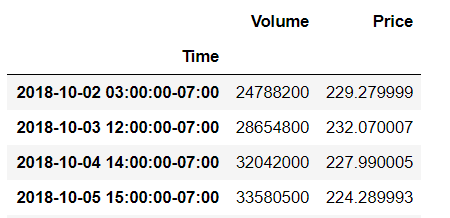

In [32]:
Image("table.PNG")

In [108]:
df_raw.rename(columns = {'times_of_trade':'Time'}, inplace = True)
df_raw
df = df_raw[['Volume', 'Price', 'Time']]
df
df['Time'] = pd.to_datetime(df["Time"], format = '%d-%m-%Y %H:%M:%S', utc = True).dt.tz_convert('US/Pacific')
df
df = df.sort_values('Time').set_index('Time')
df.head()
# YOUR CODE HERE
#raise NotImplementedError()

,Volume,Price
Time,,
2018-10-02 03:00:00-07:00,24788200,229.279999
2018-10-03 12:00:00-07:00,28654800,232.070007
2018-10-04 14:00:00-07:00,32042000,227.990005
2018-10-05 15:00:00-07:00,33580500,224.289993
2018-10-08 08:00:00-07:00,29663900,223.770004


In [109]:
# TEST 

assert set(df.columns) == {'Volume', "Price"}


In [110]:
# TEST 

assert df.index[0] < df.index[1]


In [111]:
# TEST 

assert type(df.index) == pd.core.indexes.datetimes.DatetimeIndex
